<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 18</center></h1>
<h1><center>April 11 ,2018 </center></h1>




# Receiver operating characteristic ROC
## Motivation
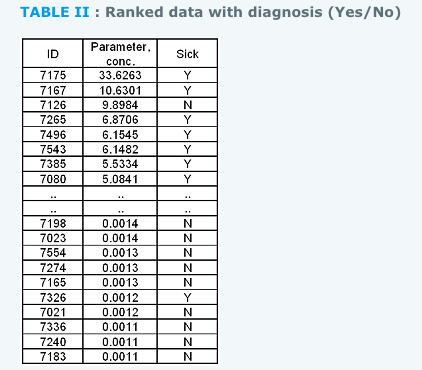

## You need to determine a score for this data. How would you choose this cutoff?

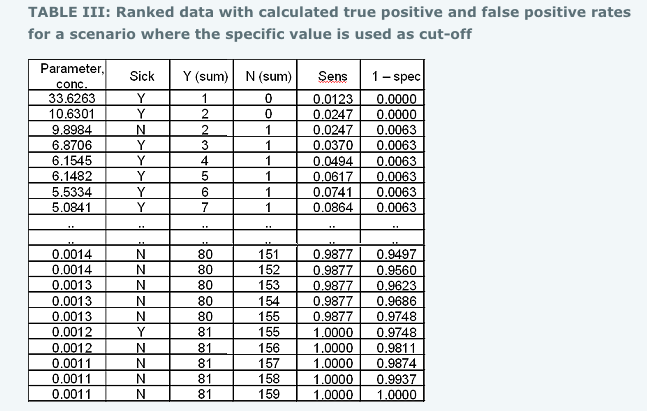

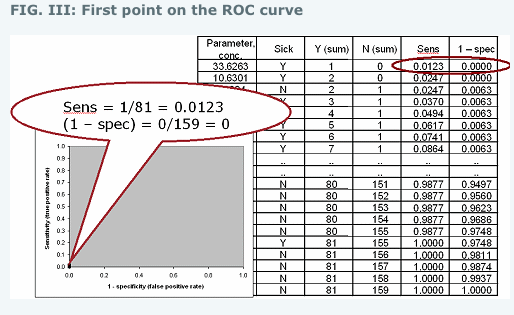

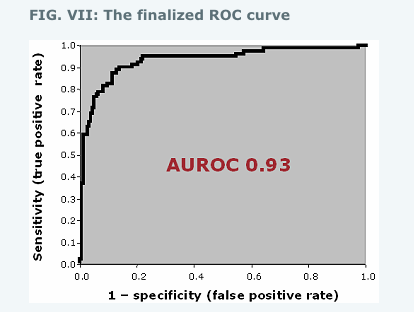

[Fig SRC:](https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used)

# Receiver operating characteristic
## ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

- ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

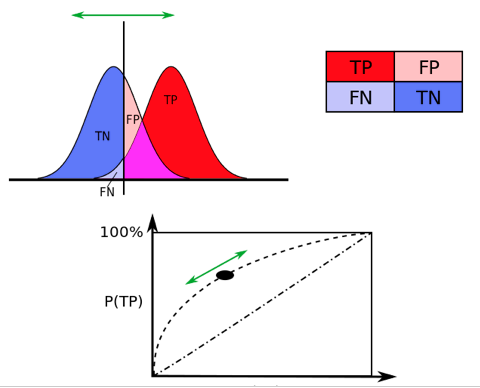

# An interactive [example](http://arogozhnikov.github.io/2015/10/05/roc-curve.html) to understand ROC

# ROC in Python
## example:

Automatically created module for IPython interactive environment


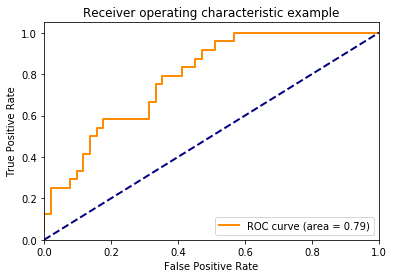

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Training, validation and testing

The training set is used to fit the models; the validation set is used to estimate prediction error for model selection; the test set is used for assessment of the generalization error of the final chosen model. Ideally, the test set should be kept in a “vault,” and be brought out only at the end of the data analysis.


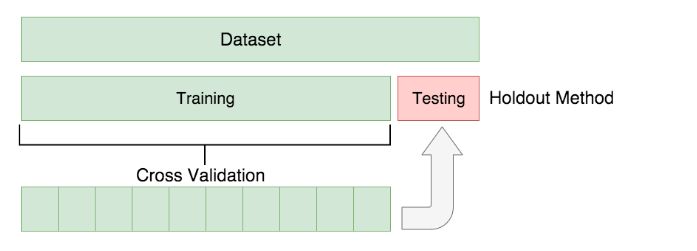

[Fig SRC](https://medium.com/@josephofiowa)

# Cross Validation
## cross validation used for validating the model performance as well as estimating the hyperparameters of the model

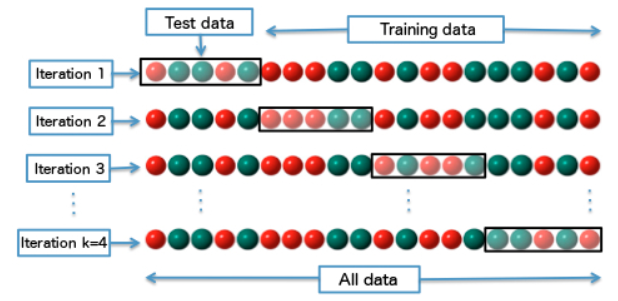


- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).


# 10-fold cross validation
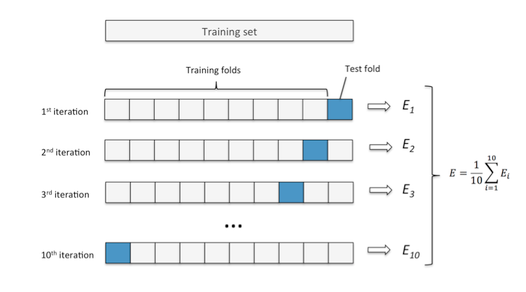

[Fig SRC](https://sebastianraschka.com/about/)

# Python example
## Prediction on Iris data with evaluation the model using cross validation

In [2]:
# import the required libraries and the data sets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape


((150, 4), (150,))

In [9]:
# do 5-fold cross validation
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
                                             
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.98 ( 0.03)


In [10]:
#  It is possible to change the score by using the scoring parameter:
from sklearn import metrics
scores = cross_val_score(  clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 ( 0.03)
